In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

### Fetch data

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url,error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url, error_bad_lines=False)

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
confirmed_us = pd.read_csv(url,error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
death_us = pd.read_csv(url, error_bad_lines=False)

df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])


In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,820,832,842,850,856,868,872,876,880,898
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,751,752,752,754,755,755,758,760,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,36,43,43,45,45,45,45,48


In [4]:
recover.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,691
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,694
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,596
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,14


In [5]:
recover_us = recover.loc[recover['Country/Region']=='US']
recover_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,189791,189910,195036,198993,212534,216169,232733,230287,243430,246414


In [6]:
confirmed_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,145,149,149,151,151,151,151,152,152,152
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,15,15,15,16,16,19,19,19,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,66,66,66,68,68,69,69,69,69,69


In [7]:
death_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,99,99,102,107,108,111,113,114,115,117
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,4,4,4,4,4,4,5,6,6,6


In [8]:
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-15 23:32:20,-25.0000,133.0000,7020,98,6338,584,27.572988,NaN,NaN,1.396011,36,AUS
1,Austria,2020-05-15 23:32:20,47.5162,14.5501,16109,628,14471,1010,178.861698,NaN,NaN,3.898442,40,AUT
2,Canada,2020-05-15 23:32:20,60.0010,-95.0010,75761,5658,36773,33330,200.131013,NaN,NaN,7.468222,124,CAN
3,China,2020-05-15 23:32:20,30.5928,114.3055,84031,4637,79273,121,5.982232,NaN,NaN,5.518202,156,CHN
4,Denmark,2020-05-15 23:32:20,56.0000,10.0000,10989,537,9157,1295,189.720561,NaN,NaN,4.886705,208,DNK


In [9]:
df_table.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/23
2,Afghanistan,2020-01-24,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/24
3,Afghanistan,2020-01-25,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/25
4,Afghanistan,2020-01-26,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/26


In [10]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Australia,2020-05-15 23:32:20,-25.0000,133.0000,7020,98,6338,584,27.572988
1,Austria,2020-05-15 23:32:20,47.5162,14.5501,16109,628,14471,1010,178.861698
2,Canada,2020-05-15 23:32:20,60.0010,-95.0010,75761,5658,36773,33330,200.131013
3,China,2020-05-15 23:32:20,30.5928,114.3055,84031,4637,79273,121,5.982232
4,Denmark,2020-05-15 23:32:20,56.0000,10.0000,10989,537,9157,1295,189.720561


In [11]:
confirmed = confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
death = death.rename(columns={"Province/State":"state","Country/Region": "country"})
recover = recover.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]

In [12]:
def visualize_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):

    f = plt.figure(figsize=(13,7))
    # Sub plot
    ax = f.add_subplot(111)
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All":
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[0:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[0:]
        date = np.arange(1,cases.shape[0]+1)[0:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[0:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[0:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[0:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[0:]
        
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed.columns[5]+" - "+confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':20})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':20})

    plt.legend(loc= "best",fontsize = 15)
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = 15)
    yl = plt.ylabel(axis_label[1],fontsize = 15)
    
    plt.show()

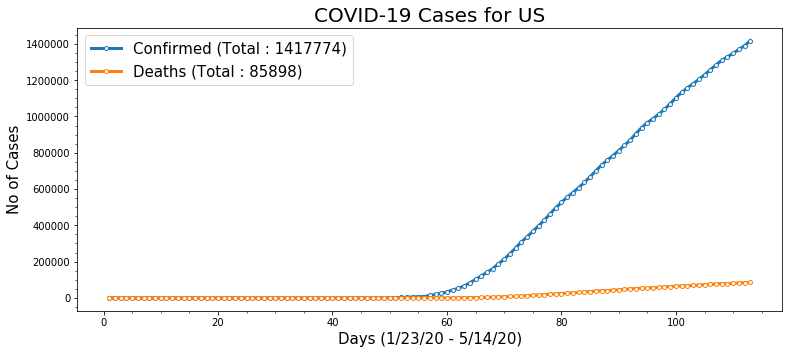

In [13]:
visualize_cases(confirmed, death, country = 'US')

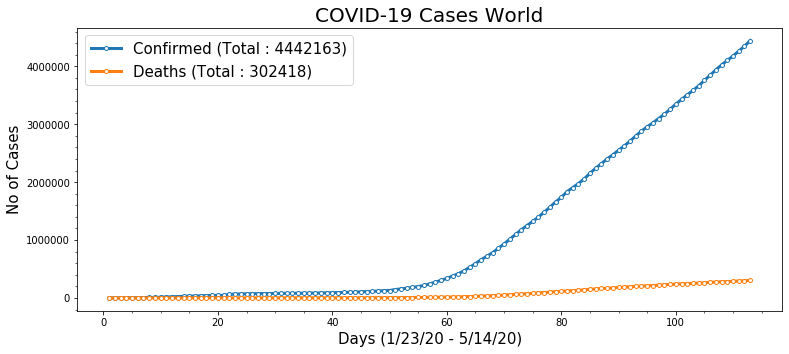

In [14]:
visualize_cases(confirmed, death)

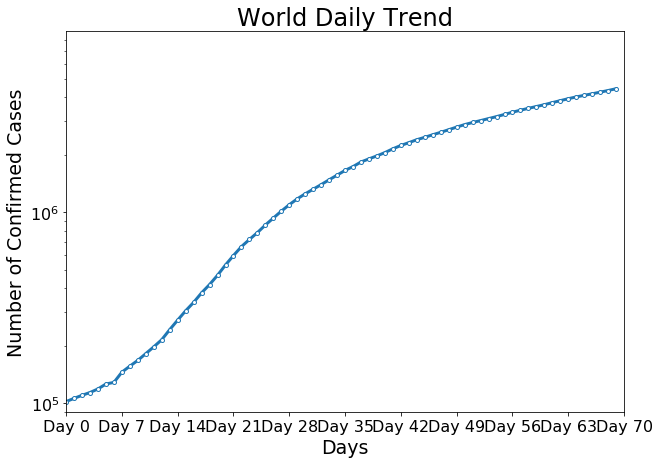

In [15]:
temp_data = confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(10,7))
f.add_subplot(111)
threshold = 100000
t = temp_data.values

t = t[t >threshold]
date = np.arange(0,len(t[:]))
xnew = np.linspace(date.min(), date.max(), 10)

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
plt.plot(date,t,"-.",label="Confirmed Cases",**marker_style)
plt.xlim(date[0],date[-1])
plt.ylim(threshold - threshold/10,2*t.max())
# plot Params
# plt.tight_layout()
plt.tick_params(labelsize = 16)        
plt.xticks(np.arange(0,len(t[:])+7,7),[ "Day "+str(i) for i in range(len(t[:])+7)][::7]) 
plt.xlabel("Days",fontsize=19)
plt.ylabel("Number of Confirmed Cases",fontsize=19)
plt.title("World Daily Trend",fontsize=24)
# plt.legend(loc = "upper left")
plt.yscale("log")
plt.show()

In [16]:
## group by country, sum and transpose
dtf = confirmed.copy()
dtf = dtf.drop(['Lat','Long'], axis=1).groupby("country").sum().T

## convert index to datetime
dtf.index = pd.to_datetime(dtf.index, infer_datetime_format=True)

## create total cases column
dtf = pd.DataFrame(index=dtf.index, data=dtf["US"].values, columns=["total"])
## create new cases column
dtf["new"] = dtf["total"] - dtf["total"].shift(1)
dtf["new"] = dtf["new"].fillna(method='bfill')
dtf.head()

,total,new
2020-01-22,1,0.0
2020-01-23,1,0.0
2020-01-24,2,1.0
2020-01-25,2,0.0
2020-01-26,5,3.0


In [17]:
dtf.index=='2020-02-15'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [18]:
'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(X, c, k, m):
    y = c / (1 + np.exp(-k*(X-m)))
    return y
## optimize from scipy
logistic_model, cov = optimize.curve_fit(logistic_f,
                                xdata=np.arange(len(dtf["total"])), 
                                ydata=dtf["total"].values, 
                                maxfev=10000,
                                p0=[np.max(dtf["total"]), 1, 1])
## print the parameters
logistic_model

array([1.45058133e+06, 1.00814490e-01, 8.72134656e+01])

In [19]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="green")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="red")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
   
    ## focus on last
    first_idx = dtf[pd.notnull(dtf["forecast"])].index[0]
    first_loc = dtf.index.tolist().index(first_idx)
    zoom_idx = dtf.index[first_loc-zoom]
    dtf.loc[zoom_idx:]["ts"].plot(marker=".", linestyle='None', ax=ax[1], color="black", 
                                  title="Zoom on the last "+str(zoom)+" observations")
    dtf.loc[zoom_idx:]["model"].plot(ax=ax[1], color="green")
    dtf.loc[zoom_idx:]["forecast"].plot(ax=ax[1], grid=True, color="red")
    ax[1].fill_between(x=dtf.loc[zoom_idx:].index, y1=dtf.loc[zoom_idx:]['conf_int_low'], 
                       y2=dtf.loc[zoom_idx:]['conf_int_up'], color='b', alpha=0.3)
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [20]:
def forecast_curve(ts, f, model, pred_ahead=None, freq="D", zoom=30, figsize=(15,5)):
    '''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index
#     index = pd.date_range(start=start,periods=pred_ahead,freq=freq)
    index = pd.date_range(start=dtf.index[-1],periods=pred_ahead,freq=freq)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

/Users/changzhou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


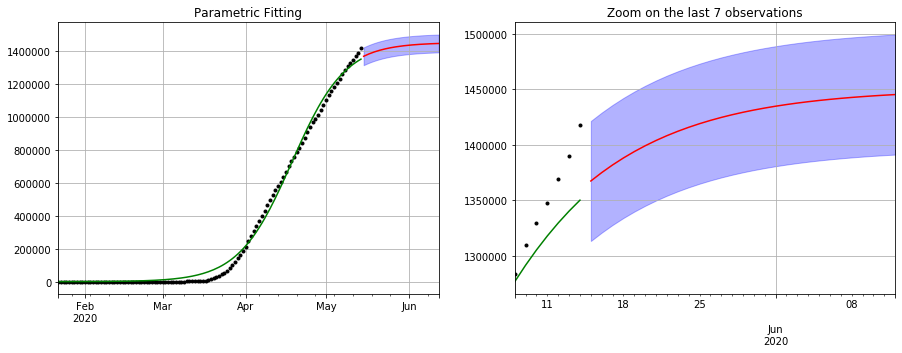

In [21]:
preds = forecast_curve(dtf["total"], logistic_f, logistic_model, 
                       pred_ahead=30, freq="D", zoom=7)